## Binomial Tests
[Link to lecture notes](https://github.com/bcaffo/MathematicsBiostatisticsBootCamp2/blob/master/Lecture4.pdf)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, t, binom_test, beta
from math import comb

#### Lecture example
We want to test the side effects of two drugs; A and B. We choose a group of 40 people and randomly assign 20 of them to drug A and the other 20 to drug B. In this case, the observed result of the experiment is a binary variable (side effects or not). The results are given in the following table:

|   drug   |Side effects|None|Total|
|-----|------|------| ------|
|Drug A|  11   |   9   |  20  |
|Drug B|  5    |   15  |  20  |
|Total |  16   |   24  |  40  |

**1. Testing the alternative hypothesis that the ratio of side effects from drug A is greater than 0.1, given the null hypothesis that the ratio is 0.1**

In the wald test, we use the sample mean (p_hat) to compute the variance p(1-p). Whereas in the score test, we use the population mean (p0) under the null hypothesis to compute the variance. The latter performs better than the former. Both statistics are normally distributed for large n values.

In [2]:
# One sided test using the score test
n = 20
p_test = 11./20
p_hyp = 0.1
var = p_hyp*(1-p_hyp)
stat = (p_test - p_hyp) / np.sqrt(var/n)

print('Statistic: {:.3f}'.format(stat))
print('Z_0.95 = 1.645 << {:.3f}'.format(stat))

Statistic: 6.708
Z_0.95 = 1.645 << 6.708


An exact binomial test can be conducted by computing the probability of getting more extreme results under the null hypothesis.

In [3]:
# Computing the exact p_value
# Which is the probability of getting values equally or more extreme than
# the test sample values assuming the distribution is the null hypothesis distribution
prob_fun = lambda n, k: comb(n, k) * 0.1**k * 0.9**(n-k)
p_val = 0

for x in range(11, 21):
    p_val += prob_fun(20, x)
    
print('P-value = {}'.format(p_val))

P-value = 7.088606331722206e-07


Using Scipy `binom_test`

In [4]:
# x is the number of successes (where success is the ocurrence of the event we are interested in)
# n is the number of trials
# p is the probability of the hypothesis we are testing
binom_test(x=11, n=20, p=0.1, alternative='greater')

7.088606331722207e-07

**2. Testing the alternative hypothesis that drugs A and B have different side effect occurrence probabilities (two sided test) against the null hypothesis that they do have the same probabilities of side effects.**

In [5]:
n1 = 20
p1 = 11./20

n2 = 20
p2 = 5./20

p = (5. + 11.) / (20 + 20)
st_error = np.sqrt(p*(1-p)*(1./n1 + 1./n2))

stat = (p1 - p2) / st_error

p_val = norm.cdf(x=-stat) * 2
print('Statistic: {:.3f}'.format(stat))
print('P-value = {}'.format(p_val))


Statistic: 1.936
P-value = 0.05280751141611358


### Bayesian inference


The following plots are a Monte Carlo simulation of the difference (and ratio and odd ratio) between the posteriors of PB and PA, which represent the probability of having side effects from the drugs B and A, respectively. We use beta priors for each of the two drugs' success rates (side effect rate). The posterior is computed by multiplying the prior and the likelihood of the observed data.

The test is inverted here (PB - PA instead of PA - PB) to get consistent results with the summary in the slides.

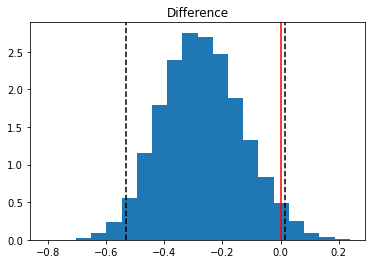

Mean: -0.270
Median: -0.275
CI: [-0.532, 0.014]




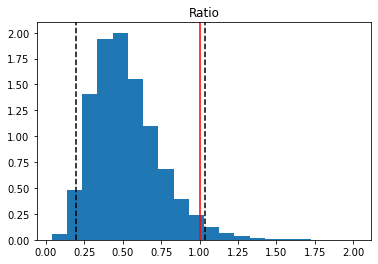

Mean: 0.524
Median: 0.491
CI: [0.200, 1.038]




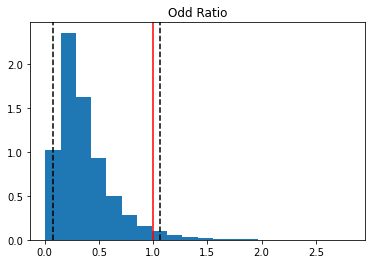

Mean: 0.369
Median: 0.298
CI: [0.079, 1.063]




In [6]:
size = 10000

posterior_fun = lambda x, n, size, a=1, b=1: beta.rvs(a=x+a, b=n-x+b, size=size)

n1 = 20
x1 = 11
p1 = x1/n1

n2 = 20
x2 = 5
p2 = x2/n2

drug_A_post = posterior_fun(x1, n1, size)
drug_B_post = posterior_fun(x2, n2, size)

diff = drug_B_post - drug_A_post
ratio = drug_B_post / drug_A_post
odd_ratio = (drug_B_post / (1 - drug_B_post)) / (drug_A_post / (1 - drug_A_post))

def plot_hist_with_summary(arr, title, vertical_x):
    plt.hist(arr, bins=20, density=True)
    plt.title(title)
    qmin, qmax = np.quantile(arr, [0.025, 0.975])

    plt.axvline(qmin, color='black', linestyle='--')
    plt.axvline(qmax, color='black', linestyle='--')
    plt.axvline(vertical_x, color='red')
    plt.show()

    print(f'Mean: {arr.mean():.3f}')
    print(f'Median: {np.median(arr):.3f}')
    print(f'CI: [{qmin:.3f}, {qmax:.3f}]')
    print('\n')
    

plot_hist_with_summary(diff, 'Difference', 0)
plot_hist_with_summary(ratio, 'Ratio', 1)
plot_hist_with_summary(odd_ratio, 'Odd Ratio', 1)

We notice that zero (and 1 for the ratios) is inside the confidence interval of the estimated difference between the two drugs' posteriors, therefore the difference between the two drugs is not statistically significant.

The following are the same plots but inverted

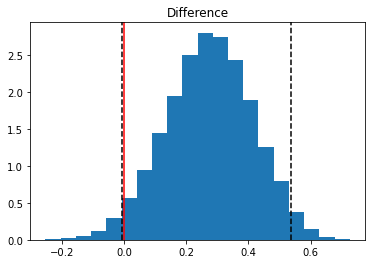

Mean: 0.274
Median: 0.277
CI: [-0.006, 0.536]




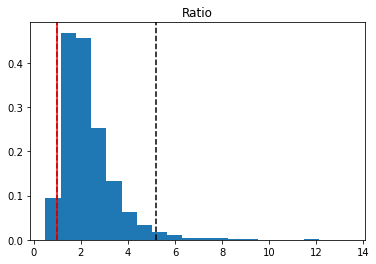

Mean: 2.311
Median: 2.051
CI: [0.982, 5.178]




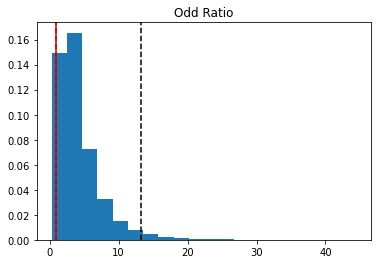

Mean: 4.314
Median: 3.384
CI: [0.972, 13.234]




In [7]:
size = 10000

posterior_fun = lambda x, n, size, a=1, b=1: beta.rvs(a=x+a, b=n-x+b, size=size)

n1 = 20
x1 = 11
p1 = x1/n1

n2 = 20
x2 = 5
p2 = x2/n2

drug_A_post = posterior_fun(x1, n1, size)
drug_B_post = posterior_fun(x2, n2, size)

diff = drug_A_post - drug_B_post
ratio = drug_A_post / drug_B_post
odd_ratio = (drug_A_post / (1 - drug_A_post)) / (drug_B_post / (1 - drug_B_post))
    

plot_hist_with_summary(diff, 'Difference', 0)
plot_hist_with_summary(ratio, 'Ratio', 1)
plot_hist_with_summary(odd_ratio, 'Odd Ratio', 1)